General imports


In [90]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
train = pd.read_csv("../data/features/selection/selected_features_train.csv")
test = pd.read_csv("../data/features/selection/selected_features_test.csv")
X_train, y_train = train.drop(columns=["material"]), train["material"]
X_test, y_test = test.drop(columns=["material"]), test["material"]

PCA removed, leads to worse results


In [92]:
# Durchführt Evaluierung eines Modells, mehrere Evaluirungsmaße können bei metrics hinzugefügt werden 
# Ausgibt ein Dict mit Metriken
def evaluate_model(X, y, model, name):

    stratifiedFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    y_pred = cross_val_predict(model, X, y, cv=stratifiedFold)
    
    # Neue Metriken hier hinzufügen
    metrics = {
        'Classifier': name,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='weighted'),
        'Recall': recall_score(y, y_pred, average='weighted'),
        'F1 Score': f1_score(y, y_pred, average='weighted')
    }
    
    print(name)
    confusionMatrix = confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    return metrics


# Führt evaluate model aus auf classifiers, die mit Dictionary eingegeben wurden
# Ausgabe: Dataframe mit Metriken für Classifiers die Eingegeben wurden
def compare_classifiers(X_train, y_train, classifiers):

    results = []
   
    for name, model in classifiers.items():
    
        results.append(evaluate_model(X_train, y_train, model, name))
   

    results_df = pd.DataFrame(results)
    return results_df

SVM Linear


In [93]:
from sklearn.svm import SVC

pipe_SVC_linear = Pipeline(
    [("scaler", StandardScaler()), ("clf", SVC(kernel="linear", random_state=42))]
)

SVM RBF


In [94]:
from sklearn.svm import SVC

pipe_SVC_rbf = Pipeline([("scaler", StandardScaler()), ("clf", SVC(kernel="rbf", random_state=42))])

Naive Bayes


In [95]:
from sklearn.naive_bayes import GaussianNB

pipe_gaussNB = Pipeline([("scaler", StandardScaler()), ("clf", GaussianNB())])

Logistic Regression


In [96]:
from sklearn.linear_model import LogisticRegression

pipe_logreg = Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(random_state=42))])

Random Forest


In [97]:
from sklearn.ensemble import RandomForestClassifier

pipe_forest = Pipeline(
    [("scaler", StandardScaler()), ("clf", RandomForestClassifier(random_state=42))]
)

Decision Tree


In [98]:
from sklearn.tree import DecisionTreeClassifier

pipe_tree = Pipeline([("scaler", StandardScaler()), ("clf", DecisionTreeClassifier(random_state=42))])

Hist Gradient Boosting


In [108]:
from sklearn.ensemble import HistGradientBoostingClassifier

pipe_HGB = Pipeline(
    [("scaler", StandardScaler()), ("clf", HistGradientBoostingClassifier(random_state=42))]
)

AdaBoost


In [100]:
from sklearn.ensemble import AdaBoostClassifier

pipe_ada_boost = Pipeline([("scaler", StandardScaler()), ("clf", AdaBoostClassifier(random_state=42))])

_Evaluation_


SVM Linear


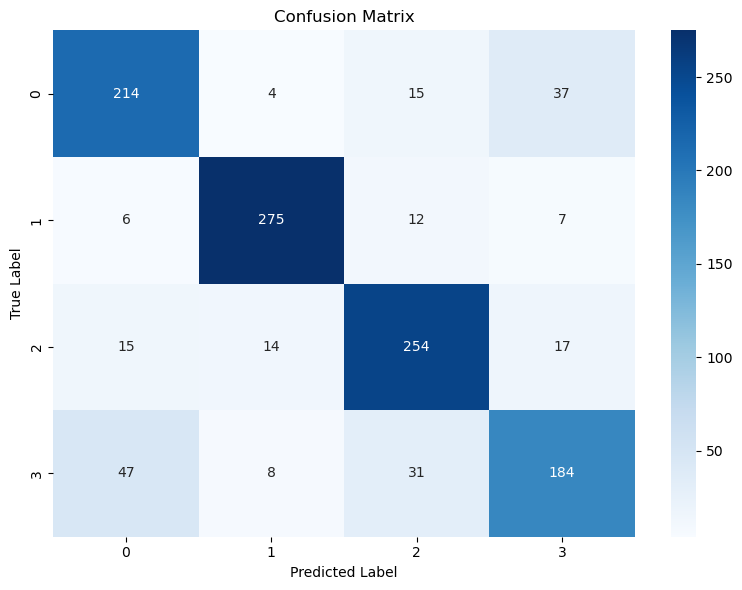

SVM Rbf


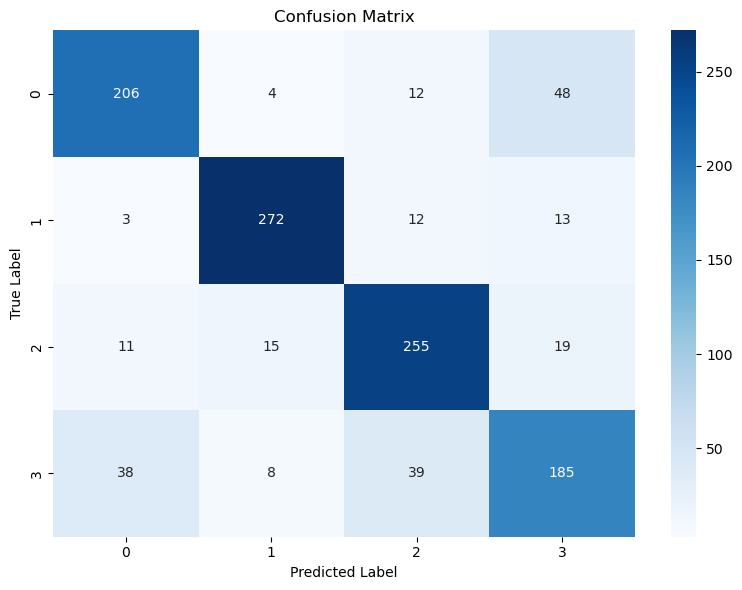

Gaussian NB


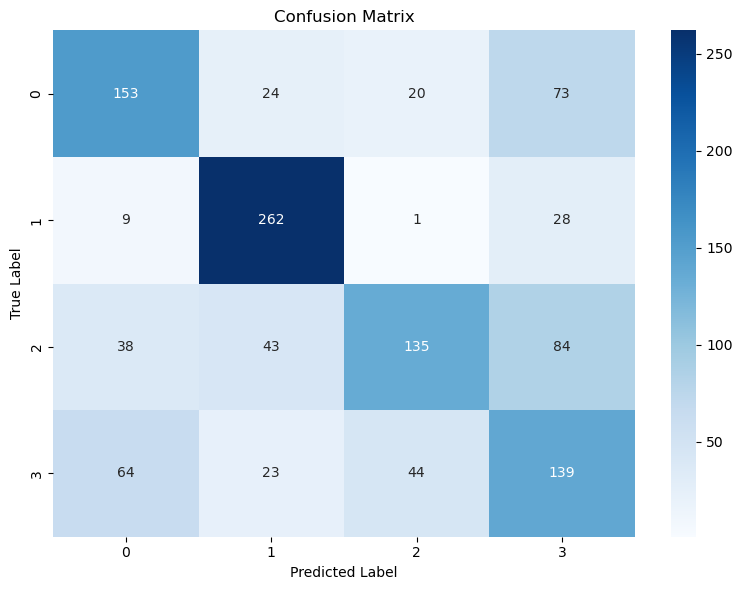

Random Forest


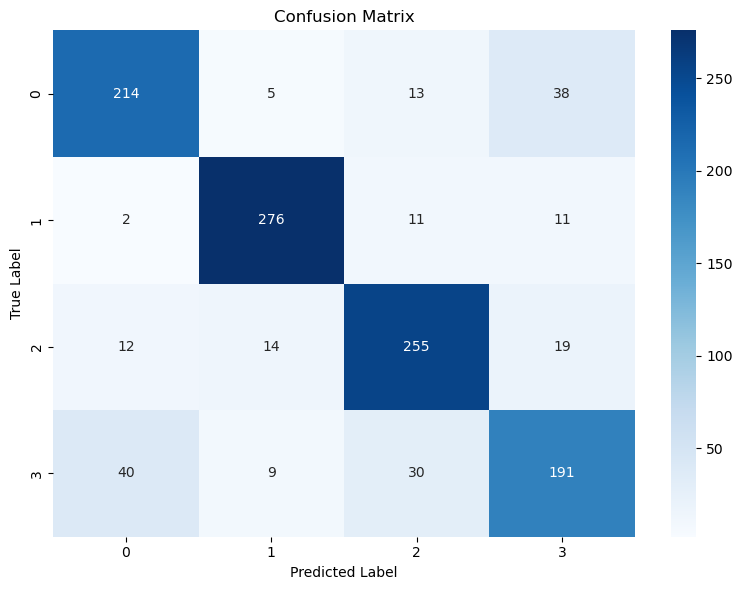

Decision Tree


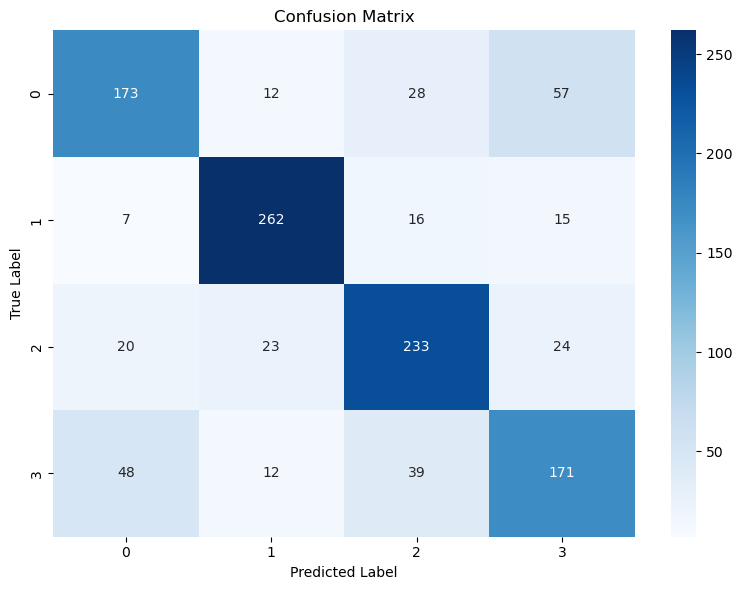

HistGradientBoosting


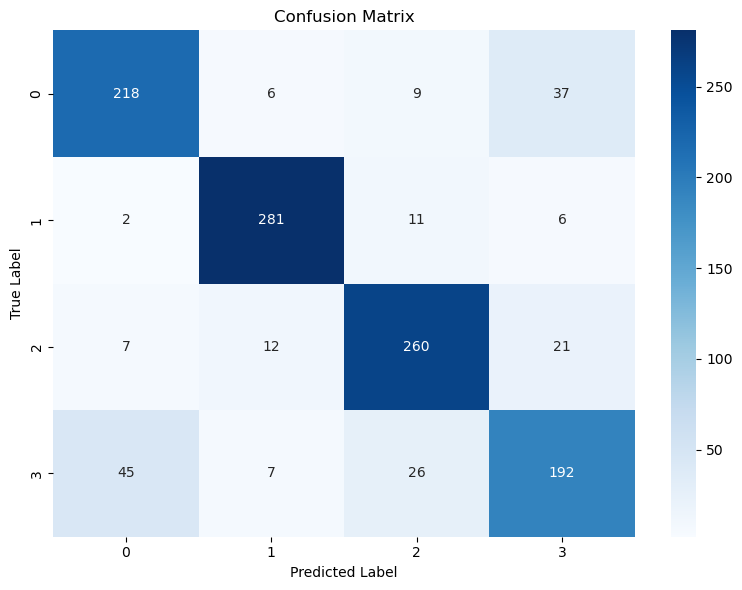

c:\Users\Floppa\miniconda3\envs\drill\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Floppa\miniconda3\envs\drill\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Floppa\miniconda3\envs\drill\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Floppa\miniconda3\envs\drill\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

AdaBoost


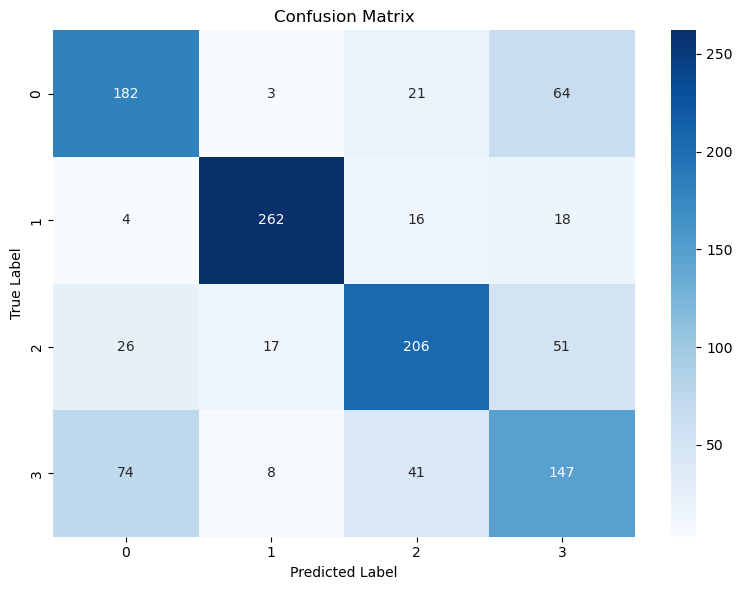

c:\Users\Floppa\miniconda3\envs\drill\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Floppa\miniconda3\envs\drill\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Logistic Regression


c:\Users\Floppa\miniconda3\envs\drill\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


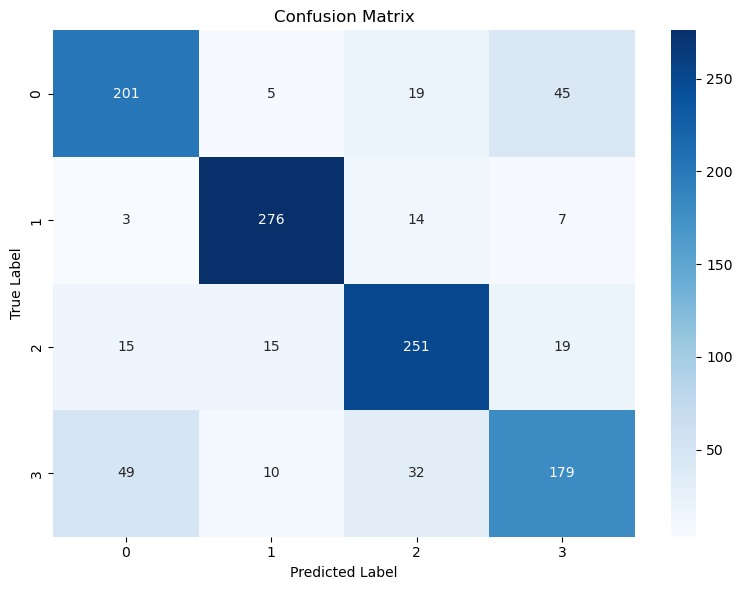

,Classifier,Accuracy,Precision,Recall,F1 Score
0,SVM Linear,0.813158,0.812269,0.813158,0.812142
1,SVM Rbf,0.805263,0.804866,0.805263,0.804770
2,Gaussian NB,0.604386,0.612374,0.604386,0.600164
3,Random Forest,0.821053,0.819869,0.821053,0.820325
4,Decision Tree,0.735965,0.734070,0.735965,0.734543
5,HistGradientBoosting,0.834211,0.832710,0.834211,0.833289
6,AdaBoost,0.699123,0.703691,0.699123,0.701030
7,Logistic Regression,0.795614,0.793596,0.795614,0.794193


In [109]:
classifiers = {
    "SVM Linear": pipe_SVC_linear,
    "SVM Rbf": pipe_SVC_rbf,
    "Gaussian NB": pipe_gaussNB,
    "Random Forest": pipe_forest,
    "Decision Tree": pipe_tree,
    "HistGradientBoosting": pipe_HGB,
    "AdaBoost": pipe_ada_boost,
    "Logistic Regression": pipe_logreg,
}

comparison_results = compare_classifiers(X_train, y_train, classifiers)
comparison_results

Search von Best Parameters für HistGradientBoosting


In [ ]:
# GRIDSEARCH

from sklearn.model_selection import GridSearchCV

pipe_HGB = Pipeline([("clf", HistGradientBoostingClassifier())])

# Hist Gradient Boosting
model = pipe_HGB

# Für Pipelines nutze "clf__{Parametername}"", wenn clf für Classifier-Schritt im Pipeline steht
param_dist = {
    # Parameter hier: z.B
    "clf__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "clf__max_iter": [100, 200, 300, 400],
    "clf__max_depth": [4, 6, 8, 10],
    "clf__min_samples_leaf": [10, 20, 30, 40, 50, 60],
    "clf__l2_regularization": [
        0.0,
        0.25,
        0.5,
        1,
        5,
    ],  # Verhindert Overfitting jedoch macht das Modell "Einfacher" 
}

gridSearch = GridSearchCV(estimator=model, param_grid=param_dist)
gridSearch.fit(X_train, y_train)

# Hier Accuracy als Metrik genutzt, mit evaluate_model kann man weiter untersuchen
print("Best parameters:", gridSearch.best_params_)
print("Best cross validation accuracy:", gridSearch.best_score_)

best_model = gridSearch.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

In [106]:
# RANDOMIZED SEARCH
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

pipe_HGB = Pipeline([("clf", HistGradientBoostingClassifier())])

# Hist Gradient Boosting
model = pipe_HGB

# Für Pipelines nutze "clf__{Parametername}"", wenn clf für Classifier-Schritt im Pipeline steht
param_dist = {  # Parameter hier: z.B
    "clf__learning_rate": [0.01, 0.05, 0.1],
    "clf__max_iter": [100, 200, 300, 400],
    "clf__max_depth": [4, 6, 8, 10],
    "clf__min_samples_leaf": [10, 20, 30, 40, 50, 60],
    "clf__l2_regularization": [0.0, 0.5, 1, 2.5, 5],
}

# Hier bei scoring einstellen wonach wird entschieden und vergliechen
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # Default Wert, je höher desto genauer aber nimmt mehr Zeit
    cv=StratifiedKFold(n_splits=5),
    random_state=42,
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross validation accuracy:", random_search.best_score_)

best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Best parameters: {'clf__min_samples_leaf': 40, 'clf__max_iter': 300, 'clf__max_depth': 6, 'clf__learning_rate': 0.1, 'clf__l2_regularization': 2.5}
Best cross validation accuracy: 0.8350877192982455
Test accuracy: 0.8473684210526315


Visualisierungen für Random Forest und Decision Tree


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


forest_model = pipe_forest.named_steps["clf"]


plt.figure(figsize=(20, 10))
plot_tree(
    forest_model.estimators_[0],
    feature_names=X_train.columns,
    class_names=y_train.unique().astype(str),
    filled=True,
    max_depth=3,
)  # Nicht alles Angezeigt, weil sonst zu unubersichtlich
plt.show()

# Plotet Importances von features

import seaborn as sns

importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": forest_model.feature_importances_}
)
importances = importances.sort_values("importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x="importance", y="feature")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

Test mit "raw" Data für Random Forest


In [33]:
# Test/Traindata mit allen features für Random Forest und Decision Tree

train = pd.read_csv("../data/features/all/combined_test.csv")
test = pd.read_csv("../data/features/all/combined_train.csv")

train = train.drop("dataFile", axis=1)
test = test.drop("dataFile", axis=1)

train.dropna()
test.dropna()


X_train, y_train = train.drop(columns=["material"]), train["material"]
X_test, y_test = test.drop(columns=["material"]), test["material"]

In [ ]:
pipe_forest = Pipeline([
    #('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth=5))
])

%timeit -n1 -r1 evaluate_model(X_train, y_train, X_test, y_test, pipe_forest, 'Random Forest')